In [1]:
"""
Slicing function and slicing picture generator.
"""
import random
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
import matplotlib.pyplot as plt
import dzcnapy_plotlib as dzcnapy

ModuleNotFoundError: No module named 'dzcnapy_plotlib'

In [2]:
attrs = {"edge_color" : "gray", "node_color" : "pink",
         "node_size" : 50, "width" : 2,}

In [3]:
def slice_network(G, T, copy=True):
    """
    Remove all edges with weight<T from G or its copy.
    """
    F = G.copy() if copy else G
    F.remove_edges_from((n1, n2) for n1, n2, w in list(F.edges(data="weight"))
                        if w < T)
    return F

In [4]:
# Draw different degrees of slicing for a random graph
ergraph = nx.erdos_renyi_graph(100, 0.1)
nx.set_edge_attributes(ergraph,  
                       {(n1, n2): random.random() for n1, n2
                        in ergraph.edges()}, 
                       "weight")

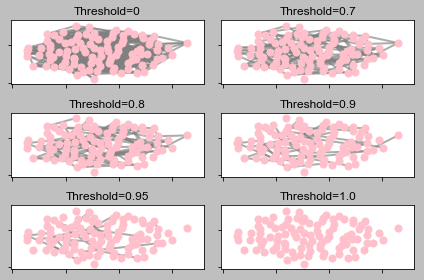

In [5]:
pos = graphviz_layout(ergraph)
for i, threshold in enumerate([0, 0.7, 0.8, 0.9, 0.95, 1.0]):
    ax = plt.subplot(3, 2, i + 1)
    slice_network(ergraph, threshold, copy=False)
    nx.draw_networkx_edges(ergraph, pos, alpha=0.65, 
                           ax=ax, **dzcnapy.small_attrs)
    nx.draw_networkx_nodes(ergraph, pos, ax=ax, **dzcnapy.small_attrs)
    dzcnapy.set_extent(pos, ax, "Threshold={}".format(threshold))

dzcnapy.plot("slicing")